In [1]:
# Install necessary packages (Uncomment and run this in your terminal or environment)
# !pip install pandas scikit-learn nltk matplotlib seaborn

# Import necessary libraries
import pandas as pd
import nltk
from nltk.corpus import stopwords
import string
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Download NLTK data
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Function to preprocess the text
def preprocess_text(text):
    text = text.lower()  # Convert to lowercase
    text = ''.join([char for char in text if char not in string.punctuation])  # Remove punctuation
    tokens = text.split()  # Tokenize by splitting on space
    tokens = [word for word in tokens if word not in stop_words]  # Remove stop words
    return ' '.join(tokens)



In [4]:
# Load and explore the dataset
data = pd.read_csv('/content/drive/MyDrive/senitment_for_NIC/IMDB Dataset.csv')  # Replace with your dataset file path
print("First few rows of the dataset:")
print(data.head())



First few rows of the dataset:
                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive


In [5]:
# Apply text preprocessing
data['cleaned_text'] = data['review'].apply(preprocess_text)



In [6]:
# View the processed dataset

print("First few rows of the cleaned dataset:")
print(data['cleaned_text'].head())

First few rows of the cleaned dataset:
0    one reviewers mentioned watching 1 oz episode ...
1    wonderful little production br br filming tech...
2    thought wonderful way spend time hot summer we...
3    basically theres family little boy jake thinks...
4    petter matteis love time money visually stunni...
Name: cleaned_text, dtype: object


In [7]:
# Split the data into train and test sets
X = data['cleaned_text']
y = data['sentiment']  # Assuming sentiment is labeled as 'positive' or 'negative'

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [ ]:
# Feature extraction using TF-IDF Vectorizer
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)




In [ ]:
# Train a Logistic Regression model
model = LogisticRegression()
model.fit(X_train_tfidf, y_train)



LogisticRegression()

In [ ]:
# Make predictions on the test set
y_pred = model.predict(X_test_tfidf)

In [ ]:
# Evaluate the model performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.8886
Classification Report:
              precision    recall  f1-score   support

    negative       0.90      0.87      0.89      4961
    positive       0.88      0.90      0.89      5039

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



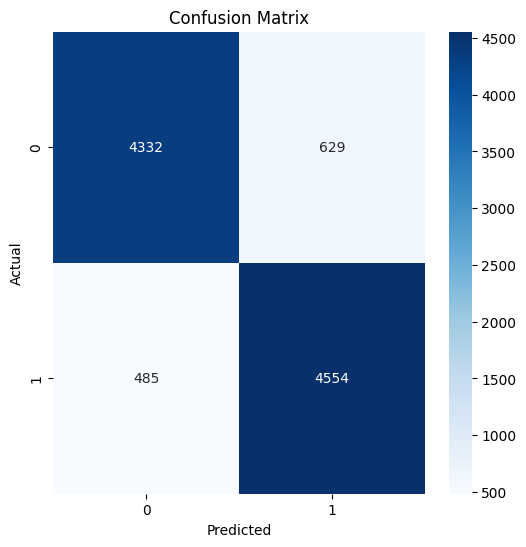

In [ ]:
# Confusion matrix to visualize model performance
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
X_train_tfidf

<40000x5000 sparse matrix of type '<class 'numpy.float64'>'
	with 3136173 stored elements in Compressed Sparse Row format>

In [ ]:
X_test_tfidf

<10000x5000 sparse matrix of type '<class 'numpy.float64'>'
	with 785752 stored elements in Compressed Sparse Row format>

In [ ]:
y_test.head()

,sentiment
33553,positive
9427,positive
199,negative
12447,positive
39489,negative


In [ ]:
model.predict(vectorizer.transform(["this is a bad movie"]))

array(['negative'], dtype=object)